# PART 3
## Normalize data

Scran normalization: since the cell types show intrinsic differences in library sizes, we will running the normalzation on each cell type separately.

- **INPUT:**
    - ```counts_cf_ctf_gf_sf.RData``` 
    - ```anno_cells_cf_ctf_gf_sf.RData```
    - ```anno_samples_cf_ctf_gf_sf.RData```
    - ```anno_genes_cf_ctf_gf_sf.RData```
    - ```cell_relabelling.csv``` file containing unified cell type annotations. Stored in additional_input_files sub-directory.
    
    
- **OUTPUT:**

    -  ```counts_norm.mtx``` 
    -  ```anno_cells_norm.txt``` 
    -  ```anno_samples_norm.txt``` 
    -  ```anno_genes_norm.txt``` 

### load data

In [1]:
library(ggplot2)
library(SingleCellExperiment)
library(scran)
library(scater)
library(Matrix)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [2]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install(c("SingleCellExperiment","scran","scater"))

In [3]:
path_to_additional_files="/work/project/ladcol_006/analysis/AMLniche/comparativeAnalysis/scripts_for_paper/datasets/AML_healthy/additional_input_files/"

In [4]:
# load cell relabelling file
print("load cell_relabelling")
file="cell_relabelling.csv"
cell_relabelling <- read.csv(file = paste(path_to_additional_files, file, sep="")
                             ,sep = ";"
)
rownames(cell_relabelling) <- cell_relabelling$cell_type_original
print(str(cell_relabelling))

[1] "load cell_relabelling"
'data.frame':	40 obs. of  9 variables:
 $ cell_type_original    : chr  "B" "CD10+ B cells" "CD20+ B cells" "ProB" ...
 $ cell_type             : chr  "B" "B" "B" "B" ...
 $ source                : chr  "van Galen et al., 2019" "Oetjen et al., 2018" "Oetjen et al., 2018" "van Galen et al., 2019" ...
 $ cell_type_color       : chr  "green" "green" "green" "green" ...
 $ cell_type_color_hex   : chr  "#4FC384" "#4FC384" "#4FC384" "#4FC384" ...
 $ cell_type_shape       : int  12 12 12 12 13 13 13 13 13 13 ...
 $ cell_subtype          : chr  "B" "B" "B" "B" ...
 $ cell_subtype_color    : chr  "green" "green" "green" "green" ...
 $ cell_subtype_color_hex: chr  "#4FC384" "#4FC384" "#4FC384" "#4FC384" ...
NULL


In [5]:
# load counts
print("load counts")
load("counts_cf_ctf_gf_sf.RData")
print("dim(counts_cf_ctf_gf_sf)")
print(dim(counts_cf_ctf_gf_sf))

[1] "load counts"
[1] "dim(counts_cf_ctf_gf_sf)"
[1] 12485 74583


In [6]:
# load cell annotation
print("load cell annotation")
load("anno_cells_cf_ctf_gf_sf.RData")
print("str(anno_cells_cf_ctf_gf_sf)")
print(str(anno_cells_cf_ctf_gf_sf))

[1] "load cell annotation"
[1] "str(anno_cells_cf_ctf_gf_sf)"
'data.frame':	74583 obs. of  33 variables:
 $ cell_ID                       : chr  "AML1012-D0_AAAAAGTTACGT" "AML1012-D0_AAAACACCAATC" "AML1012-D0_AAAATAGCCTTT" "AML1012-D0_AAACATTAAACG" ...
 $ cell_type_original            : chr  "GMP" "GMP-like" "Prog-like" "ProMono-like" ...
 $ sample_ID                     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
 $ malignant                     : logi  FALSE TRUE TRUE TRUE TRUE TRUE ...
 $ patient_ID                    : chr  "AML1012" "AML1012" "AML1012" "AML1012" ...
 $ dataset                       : chr  "GSE116256" "GSE116256" "GSE116256" "GSE116256" ...
 $ gender                        : chr  "F" "F" "F" "F" ...
 $ age                           : int  32 32 32 32 32 32 32 32 32 32 ...
 $ health_status                 : chr  "AML" "AML" "AML" "AML" ...
 $ case_or_control               : chr  "case" "case" "case" "case" ...
 $ day                           : in

In [7]:
# load sample annotation
print("load sample annotation")
load("anno_samples_cf_ctf_gf_sf.RData")
print("str(anno_samples_cf_ctf_gf_sf)")
print(str(anno_samples_cf_ctf_gf_sf))

[1] "load sample annotation"
[1] "str(anno_samples_cf_ctf_gf_sf)"
'data.frame':	33 obs. of  15 variables:
 $ sample_ID                    : chr  "AML1012-D0" "AML210A-D0" "AML328-D0" "AML419A-D0" ...
 $ patient_ID                   : chr  "AML1012" "AML210A" "AML328" "AML419A" ...
 $ dataset                      : chr  "GSE116256" "GSE116256" "GSE116256" "GSE116256" ...
 $ gender                       : chr  "F" "M" "F" "F" ...
 $ age                          : int  32 67 74 54 58 70 26 57 42 52 ...
 $ health_status                : chr  "AML" "AML" "AML" "AML" ...
 $ case_or_control              : chr  "case" "case" "case" "case" ...
 $ day                          : int  0 0 0 0 0 0 0 0 0 NA ...
 $ nr_cells_raw                 : int  1136 748 1094 1189 485 2328 1586 933 3813 108 ...
 $ nr_cells_cf                  : int  951 640 965 1091 399 2196 1410 869 3574 93 ...
 $ nr_cells_cf_ctf              : int  946 603 909 1086 388 2186 1407 868 3504 93 ...
 $ total_counts_raw_cf_ctf_gf   

In [8]:
# load gene annotation
print("load gene annotation")
load("anno_genes_cf_ctf_gf_sf.RData")
print("str(anno_genes_cf_ctf_gf_sf)")
print(str(anno_genes_cf_ctf_gf_sf))

[1] "load gene annotation"
[1] "str(anno_genes_cf_ctf_gf_sf)"
'data.frame':	12485 obs. of  7 variables:
 $ gene_symbol                          : chr  "A1BG" "A1BG-AS1" "A2M-AS1" "A4GALT" ...
 $ is_in_LR_database                    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ isLigand                             : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ isReceptor                           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ sum_pseudobulkCellType_expr          : num  40.76 1.67 2.74 10.86 18.2 ...
 $ sum_pseudobulkCellType_expr_threshold: num  1 1 1 1 1 1 1 1 1 1 ...
 $ sum_pseudobulkCellType_expr_filter   : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
NULL


In [9]:
# color scheme for celltypes
color_celltype <- cell_relabelling$cell_type_color_hex[!duplicated(cell_relabelling$cell_type)]
names(color_celltype) <- cell_relabelling$cell_type[!duplicated(cell_relabelling$cell_type)]

### process data 

In [10]:
counts_norm <- counts_cf_ctf_gf_sf

In [11]:
# normalize each cell type separately with scran
for(cluster in unique(anno_cells_cf_ctf_gf_sf$cell_type)){
    print(cluster)
  
    idx_cluster <- anno_cells_cf_ctf_gf_sf$cell_type == cluster

    # subset anno_cells_cf_ctf_gf_sf
    anno_cells_sub <- anno_cells_cf_ctf_gf_sf[idx_cluster,]

    # create SingleCellExperiment object
    print("create SingleCellExperiment object")
    original_sce <- SingleCellExperiment(
    assays = list(counts = as.matrix(counts_cf_ctf_gf_sf[,idx_cluster]))
    ,colData = anno_cells_sub
    )

    # comupte size factors
    print("comupte size factors")
    original_sce <- computeSumFactors(original_sce
                                    #,cluster=cluster 
    )

    anno_cells_cf_ctf_gf_sf$sizeFactor[idx_cluster] <- sizeFactors(original_sce)

    # normalize
    print("scran normalization")
    original_sce <- logNormCounts(original_sce
                                ,log = FALSE
                                )
    counts_norm[,idx_cluster] <- original_sce@assays@data@listData$normcounts
}


[1] "HSPC"
[1] "create SingleCellExperiment object"
[1] "comupte size factors"
[1] "scran normalization"
[1] "Mono"
[1] "create SingleCellExperiment object"
[1] "comupte size factors"
[1] "scran normalization"
[1] "DC"
[1] "create SingleCellExperiment object"
[1] "comupte size factors"
[1] "scran normalization"
[1] "Ery"
[1] "create SingleCellExperiment object"
[1] "comupte size factors"
[1] "scran normalization"
[1] "T"
[1] "create SingleCellExperiment object"
[1] "comupte size factors"
[1] "scran normalization"
[1] "B"
[1] "create SingleCellExperiment object"
[1] "comupte size factors"
[1] "scran normalization"


### visualize 

[1] "construct pseudo bulks for cell types"
[1] "str(counts_pseudobulkCellType)"
'data.frame':	12485 obs. of  193 variables:
 $ HSPC_AML1012-D0: num  0.0554 0 0 0 0.0171 ...
 $ Mono_AML1012-D0: num  0.1221 0 0.0033 0.0066 0.0231 ...
 $ DC_AML1012-D0  : num  0.053 0 0 0 0.0303 ...
 $ Ery_AML1012-D0 : num  0 0 0 0 0 0 0 0.04 0 0.08 ...
 $ T_AML1012-D0   : num  0 0 0 0 0 ...
 $ B_AML210A-D0   : num  0.0476 0 0 0 0 ...
 $ Mono_AML210A-D0: num  0.06838 0 0.00855 0 0.03419 ...
 $ DC_AML210A-D0  : num  0.07477 0 0 0 0.00935 ...
 $ Ery_AML210A-D0 : num  0.0769 0 0 0 0 ...
 $ HSPC_AML210A-D0: num  0.0863 0 0.0288 0 0.0647 ...
 $ T_AML210A-D0   : num  0.0787 0 0 0 0 ...
 $ HSPC_AML328-D0 : num  0.17633 0.00232 0.03016 0.01624 0.06032 ...
 $ T_AML328-D0    : num  0.0825 0 0 0 0.0412 ...
 $ Mono_AML328-D0 : num  0.08494 0 0.00772 0 0.01931 ...
 $ DC_AML328-D0   : num  0.1724 0.0172 0.0172 0 0.0345 ...
 $ Ery_AML328-D0  : num  0.0208 0 0.0208 0 0.0833 ...
 $ B_AML328-D0    : num  0.125 0 0 0 0 0 0 

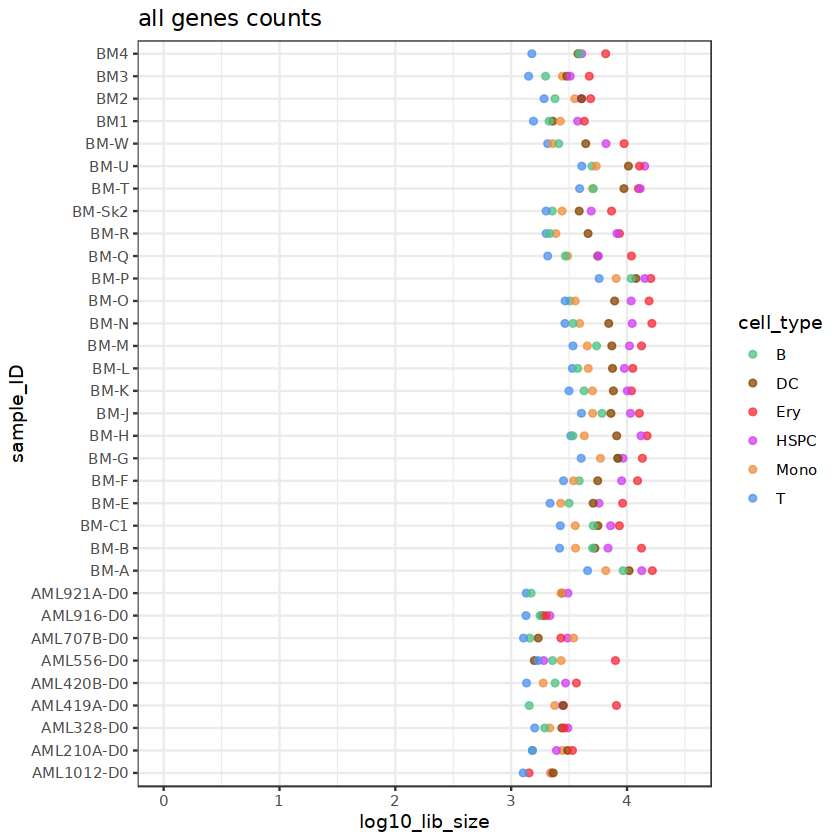

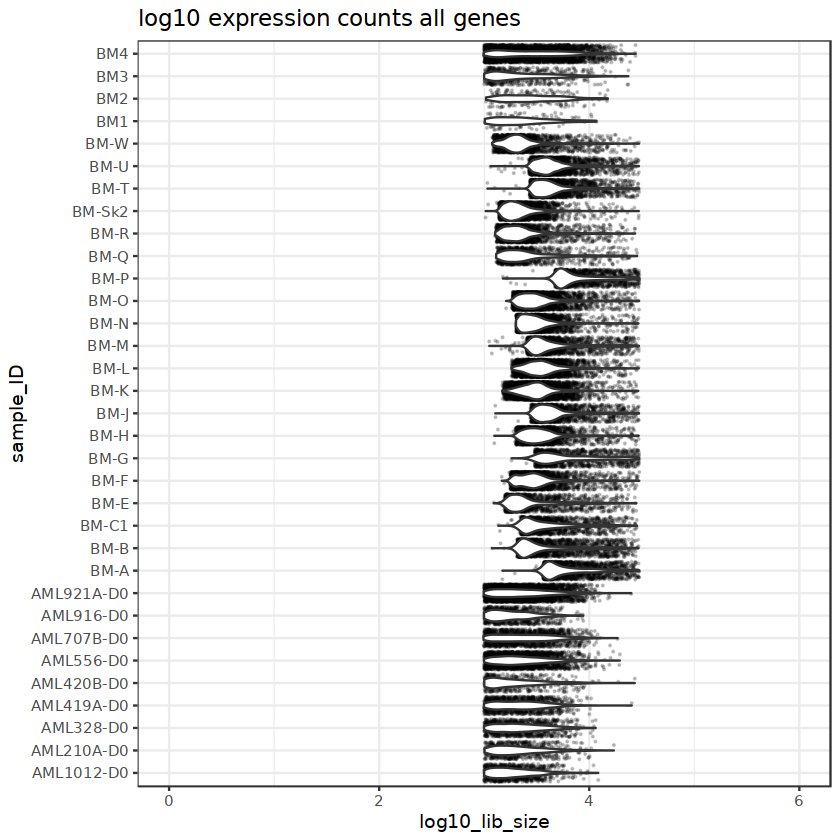

[1] "visualize expression after gene filter"
'data.frame':	74583 obs. of  2 variables:
 $ log10_lib_size: num  1.72 2.3 1.76 2.36 1.85 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


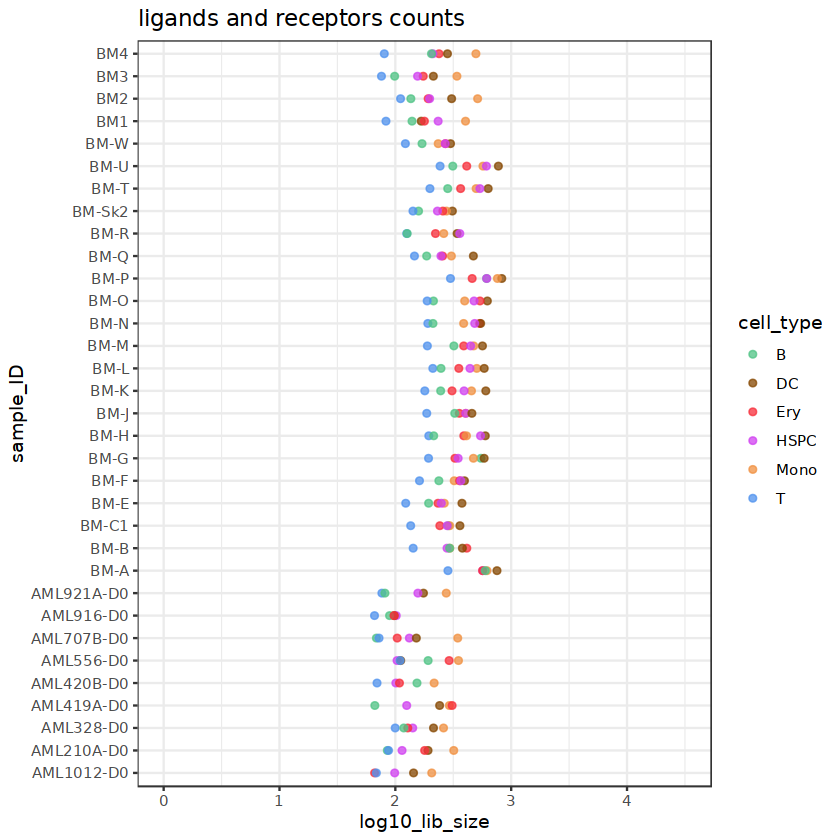

[1] "str(counts_pseudobulkCellType)"
'data.frame':	12485 obs. of  193 variables:
 $ HSPC_AML1012-D0: num  0.0834 0 0 0 0.0294 ...
 $ Mono_AML1012-D0: num  0.2134 0 0.00654 0.01236 0.03357 ...
 $ DC_AML1012-D0  : num  0.075 0 0 0 0.0424 ...
 $ Ery_AML1012-D0 : num  0 0 0 0 0 ...
 $ T_AML1012-D0   : num  0 0 0 0 0 ...
 $ B_AML210A-D0   : num  0.134 0 0 0 0 ...
 $ Mono_AML210A-D0: num  0.06646 0 0.00293 0 0.02172 ...
 $ DC_AML210A-D0  : num  0.036 0 0 0 0.0218 ...
 $ Ery_AML210A-D0 : num  0.364 0 0 0 0 ...
 $ HSPC_AML210A-D0: num  0.0767 0 0.0268 0 0.1017 ...
 $ T_AML210A-D0   : num  0.109 0 0 0 0 ...
 $ HSPC_AML328-D0 : num  0.15812 0.00101 0.02961 0.02135 0.05895 ...
 $ T_AML328-D0    : num  0.1422 0 0 0 0.0702 ...
 $ Mono_AML328-D0 : num  0.12711 0 0.00723 0 0.02163 ...
 $ DC_AML328-D0   : num  0.2634 0.0139 0.0176 0 0.0196 ...
 $ Ery_AML328-D0  : num  0.0635 0 0.081 0 0.3314 ...
 $ B_AML328-D0    : num  0.0611 0 0 0 0 ...
 $ Mono_AML419A-D0: num  0.16642 0.00753 0.01044 0.0016 0.03158

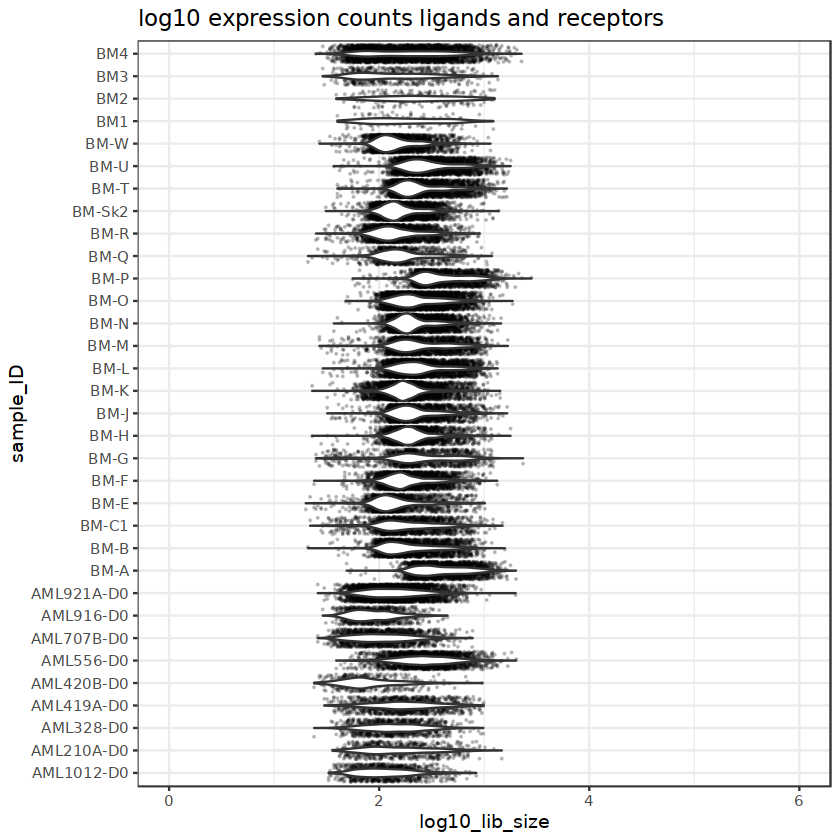

[1] "visualize expression after gene filter"
'data.frame':	74583 obs. of  2 variables:
 $ log10_lib_size: num  3.55 3.53 3.52 3.44 3.58 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


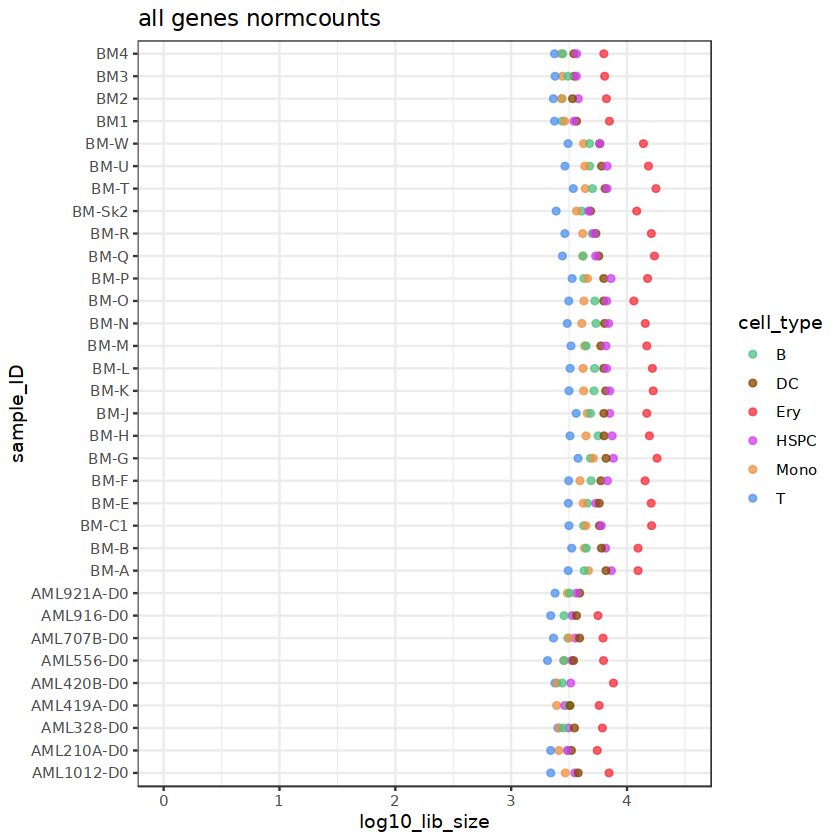

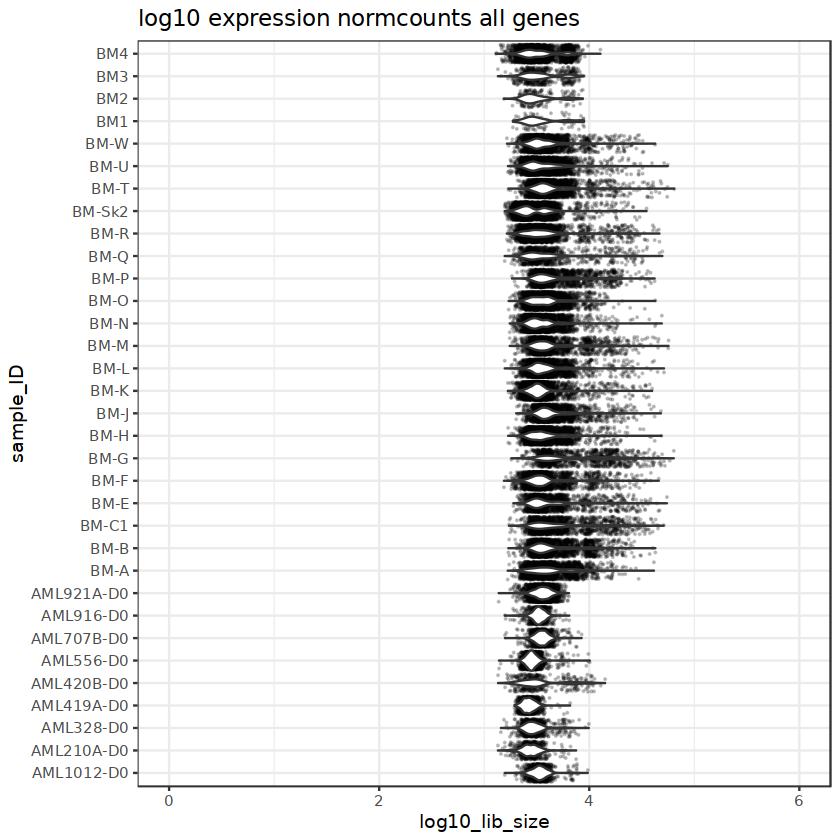

[1] "visualize expression after gene filter"
'data.frame':	74583 obs. of  2 variables:
 $ log10_lib_size: num  2.16 2.2 2.05 2.49 2.27 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


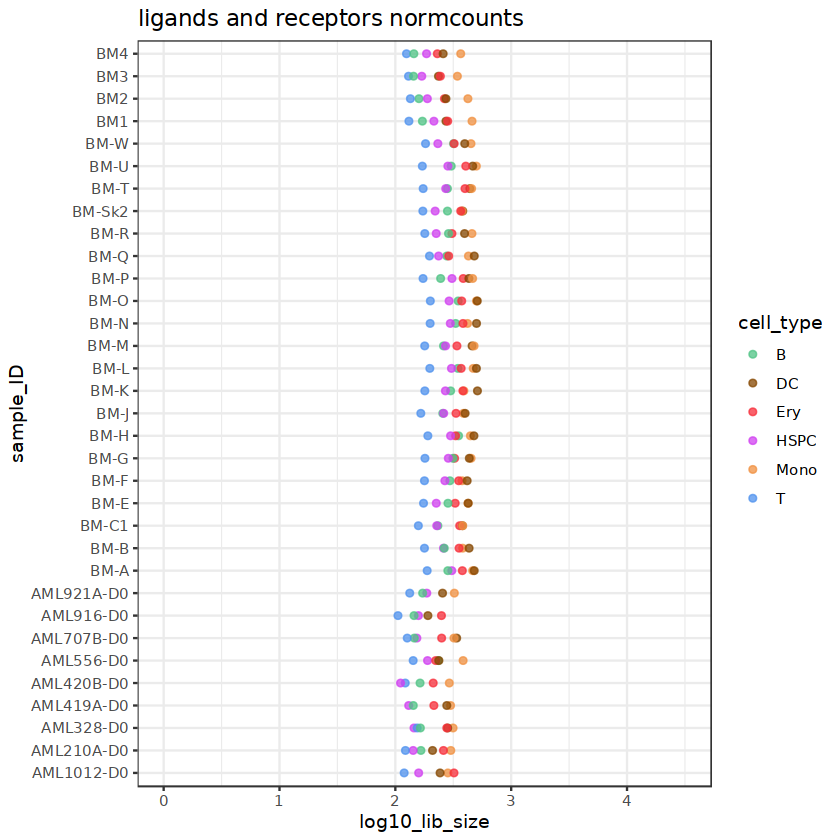

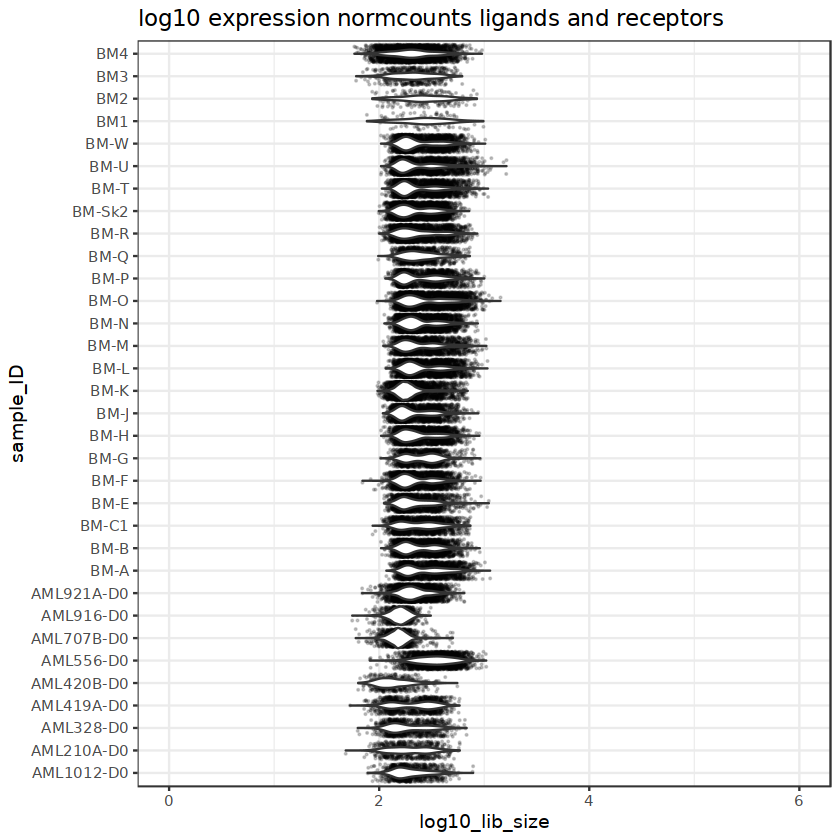

In [12]:
print("construct pseudo bulks for cell types")
for(counts_type in c("counts"
                ,"normcounts")
){
  
  ifelse(counts_type == "counts"
         ,counts <- counts_cf_ctf_gf_sf
         ,counts <- counts_norm)
  
  cell_type_IDs <- unique(anno_cells_cf_ctf_gf_sf$cell_type_ID)
  counts_pseudobulkCellType <- as.data.frame(matrix(,nrow = nrow(counts)
                                                    ,ncol = length(cell_type_IDs)
  )
  )
  i <- 1
  for(cell_type_ID in cell_type_IDs){
    #print(cell_type_ID)
    
    idx_cell_type_ID <- anno_cells_cf_ctf_gf_sf$cell_type_ID == cell_type_ID
    
    if(sum(idx_cell_type_ID) == 0){
      counts_pseudobulkCellType[,i] <- 0
    } else if( sum(idx_cell_type_ID) == 1){
      counts_pseudobulkCellType[,i] <- counts[,idx_cell_type_ID]
    } else {
      counts_pseudobulkCellType[,i] <- rowMeans(counts[,idx_cell_type_ID])
    }
    
    i <- i+1
  }
  colnames(counts_pseudobulkCellType) <- cell_type_IDs
  rownames(counts_pseudobulkCellType) <- rownames(counts)
  print("str(counts_pseudobulkCellType)")
  print(str(counts_pseudobulkCellType))
  
  # visualize expression in pseudo sorted bulk
  print("visualize expression in pseudo-bulk cell type")
  for(genes_type in c("all genes"
                      ,"ligands and receptors")){
    ifelse(genes_type == "all genes"
           ,idx_genes <- rep(T,nrow(anno_genes_cf_ctf_gf_sf))
           ,idx_genes <- anno_genes_cf_ctf_gf_sf$isLigand | anno_genes_cf_ctf_gf_sf$isReceptor
    )
    
    my_sampes <- sub("_.*", "", colnames(counts_pseudobulkCellType))
    df <- data.frame(log10_lib_size = log10(colSums(counts_pseudobulkCellType[idx_genes,]) +1)
                     ,sample_ID = sub(".*_"
                                      ,""
                                      ,colnames(counts_pseudobulkCellType)
                     )
                     ,cell_type = sub("_.*"
                                      ,""
                                      ,colnames(counts_pseudobulkCellType)
                     )
    )
    
    print(ggplot(data = df
                 ,aes(x = sample_ID
                      ,y = log10_lib_size
                      ,color = cell_type
                 )
    ) +
      geom_jitter(height = NULL
                  ,width = 0
                  ,alpha = 0.75) +
      ggtitle(paste(genes_type
                    ,counts_type)) +
      coord_flip() +
      ylim(c(0,4.5)) +
      scale_color_manual(values = color_celltype)+
      theme_bw()
    )
    
    
    # visualize expression after gene filter
    print("visualize expression after gene filter")
    df <- data.frame(log10_lib_size = log10(colSums(counts[idx_genes,]) +1)
                     ,sample_ID = anno_cells_cf_ctf_gf_sf$sample_ID
    )
    print(str(df))
    
    print(ggplot(data = df
                 ,aes(x = sample_ID
                      ,y = log10_lib_size
                 )
    ) +
      geom_jitter(height = NULL
                  ,size = 0.1
                  ,alpha = 0.2) +
      geom_violin() + 
      ggtitle(paste("log10 expression"
                    ,counts_type
                    ,genes_type)) +
      coord_flip() +
      ylim(c(0,6))+
      theme_bw()
    )
    rm(df)
    
  }
  
}


In [13]:
anno_cells_norm <- anno_cells_cf_ctf_gf_sf
anno_genes_norm <- anno_genes_cf_ctf_gf_sf
anno_samples_norm <- anno_samples_cf_ctf_gf_sf

### export

In [58]:
# export ####
print("export")
print("export counts_norm.mtx")
writeMM(obj = Matrix(as.matrix(counts_norm)
                     , sparse=TRUE)
        , file = "counts_norm.mtx"
        )

[1] "export"
[1] "export counts_norm.mtx"


NULL

In [59]:
# export anno_cells_norm
print("export anno_cells_norm.txt")
write.table(anno_cells_norm
            ,file = "anno_cells_norm.txt"
             ,sep = "\t"
            ,row.names = FALSE )

[1] "export anno_cells_norm.txt"


In [16]:
# export anno_genes
print("export anno_genes_norm.txt")
write.table(anno_genes_norm
            ,file = "anno_genes_norm.txt"
            ,sep = "\t"
            ,row.names = FALSE
)

[1] "export anno_genes_norm.txt"


In [17]:
# export anno_samples
print("export anno_samples_norm.txt")
write.table(anno_samples_norm
            ,file = "anno_samples_norm.txt"
            ,sep = "\t"
            ,row.names = FALSE
)

[1] "export anno_samples_norm.txt"
